# Some Image Processing Examples in the Python World
Fun in Fourier-space

In [1]:
%load_ext autoreload
%reload_ext autoreload

#iPython related imports and settings
from ipywidgets import interact, widgets, fixed
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

# Inline matplotlib and costume image size
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)


# manage the imports
import numpy as np
import matplotlib.pyplot as plt
import os
import time


Populating the interactive namespace from numpy and matplotlib


## Define some functions

In [14]:
def abssqr(x):
    ''' this is what a detector sees (only intensities) '''
    return np.real(x*np.conj(x))

def FT(x):
    ''' this only defines the correct fwd fourier transform including proper shift of the frequencies '''
    return np.fft.fftshift(np.fft.fft2(x)) # Fourier transform and shift

def iFT(x):
    ''' this only defines the correct inverse fourier transform including proper shift of the frequencies '''
    return np.fft.ifft2(np.fft.ifftshift(x)) # inverse Fourier transform and shift
    


## Load an Image 

The inner size of the image is (220, 220)


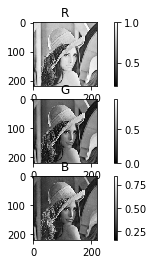

In [8]:
# Define parameters
myimage_file = 'Lena.png'
mychannel = 2 # select the color channel 0,1,2

# Load an image
myimage = plt.imread(myimage_file)
mysize = myimage.shape[0:2]
print('The inner size of the image is '+ str(mysize))
# display all channels 
plt.figure()
plt.subplot(311), plt.imshow(myimage[:,:,0],cmap = 'gray'), plt.colorbar(), plt.title('R')
plt.subplot(312), plt.imshow(myimage[:,:,1],cmap = 'gray'), plt.colorbar(), plt.title('G')
plt.subplot(313), plt.imshow(myimage[:,:,2],cmap = 'gray'), plt.colorbar(), plt.title('B')
plt.show()

# select a channel
myimage = myimage[:,:,mychannel]



In [10]:
print(np.linspace(-1,1,10).shape)

(10,)


## Generate Filter

(<matplotlib.image.AxesImage at 0x10a4d1a20>, Text(0.5, 1.0, 'My aperture'))

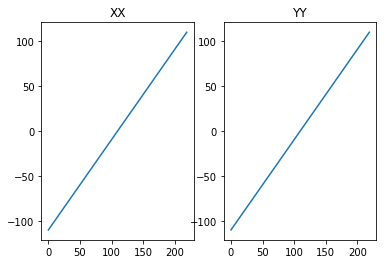

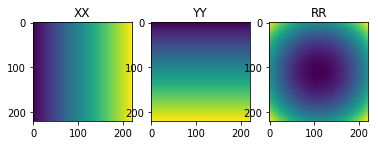

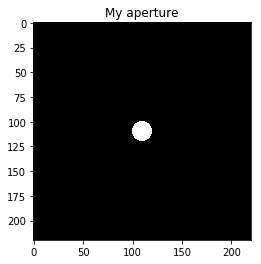

In [12]:
# Let's generate a "frequency grid"
xx = np.linspace(-mysize[0]//2, mysize[0]//2, mysize[0])
yy = np.linspace(-mysize[1]//2, mysize[1]//2, mysize[1])
XX,YY = np.meshgrid(xx,yy)
rr = XX**2 + YY**2

# Display the content of the variables
# print(xx)
# print(XX)

plt.figure()
plt.subplot(121), plt.plot(xx), plt.title('XX')
plt.subplot(122), plt.plot(yy), plt.title('YY')


plt.figure()
plt.subplot(131), plt.imshow(XX), plt.title('XX')
plt.subplot(132), plt.imshow(YY), plt.title('YY')
plt.subplot(133), plt.imshow(rr), plt.title('RR')

# Let's generate an aperture
myradius = 10
myaperture = rr<(myradius**2)

plt.figure()
plt.imshow(myaperture, cmap='gray'), plt.title('My aperture')


## Fouriertransform the image

(<matplotlib.image.AxesImage at 0x10a340d68>,
 Text(0.5, 1.0, 'ABS of FT of image (shifted)'))

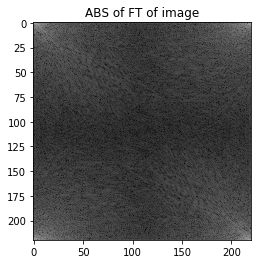

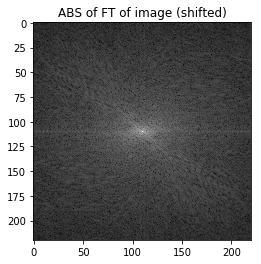

In [15]:
# do fourier transform of an image
myimage_ft = np.fft.fft2(myimage)

plt.figure()
plt.imshow(np.abs(myimage_ft)**.1, cmap='gray'), plt.title('ABS of FT of image')

# shift the frequencies according to "optics"
myimage_ft = FT(myimage)

plt.figure()
plt.imshow(np.abs(myimage_ft)**.1, cmap='gray'), plt.title('ABS of FT of image (shifted)')




## Filter the image with a low-pass

(<matplotlib.axes._subplots.AxesSubplot at 0x10a4acf60>,
 Text(0.5, 1.0, 'Filtered image'))

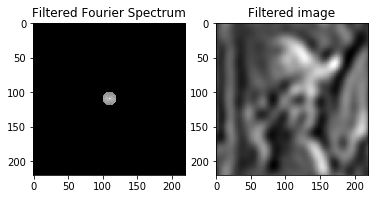

In [16]:
# Multiply the frequency with the aperture function in Freq-Space
myimage_ft_filtered = myimage_ft*myaperture

# bring result back to real-space -> corresponds to a convolution in real-space
myimage_filtered = np.real(iFT(myimage_ft_filtered))

plt.figure()
plt.subplot(121), plt.imshow(np.abs(myimage_ft_filtered)**.1, cmap='gray'), plt.title('Filtered Fourier Spectrum')
plt.subplot(122), plt.imshow(myimage_filtered, cmap='gray'), plt.title('Filtered image')



# Save the result

In [17]:
plt.imsave('Lena_filtered.png',myimage_filtered)